In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
plt.style.use('paper_style.mplstyle')

In [43]:
loaded = np.load('data/plot_data_final_run.npz')
seps = loaded['seps']
acc_test = loaded['acc_test']
num_photons = loaded['num_photons']
kept = loaded['kept']
eff = loaded['eff']
resolutions = loaded['resolutions']

crlb = np.loadtxt('data/crlb.txt', skiprows=1, delimiter=',')

In [67]:
len(acc_test)

10

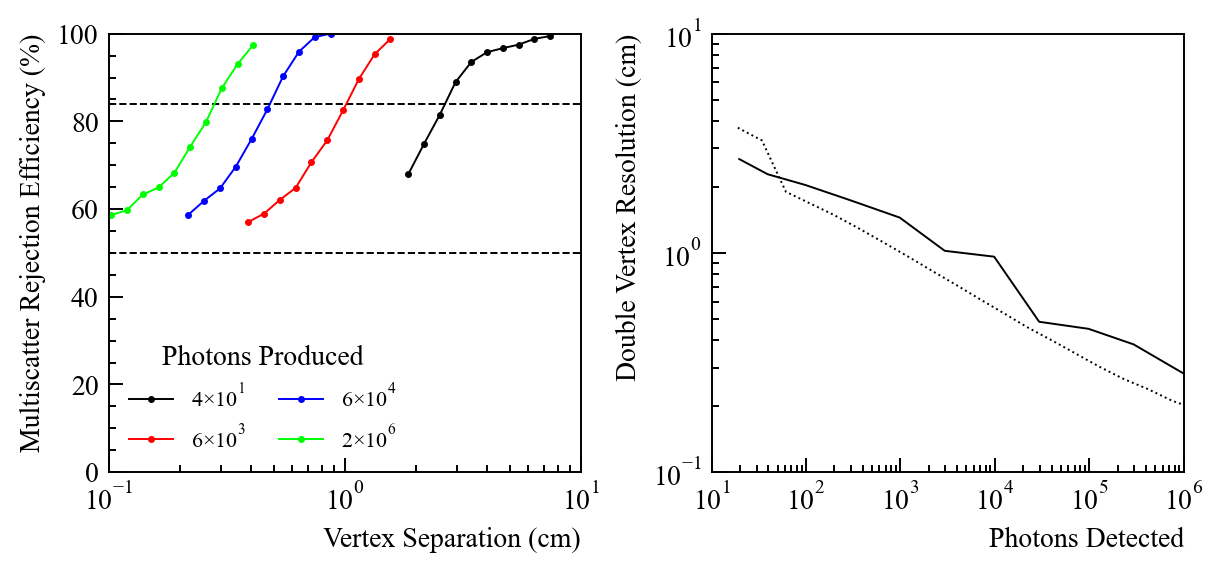

In [74]:
to_plot = [4e1, 6e3, 6e4, 2e6]

acc_plot = np.zeros((len(acc_test), len(to_plot)))
seps_plot = np.zeros((len(acc_test), len(to_plot)))

ind = 0
for i in range(len(num_photons)):
    if num_photons[i] in to_plot:
        acc_plot[:, ind] = acc_test[:, i]
        seps_plot[:, ind] = seps[:, i]
        ind += 1

fig, ax = plt.subplots(1, 2, figsize=(6, 2.75), layout='constrained')
[ax[0].axhline(t, color='k', ls='--') for t in [50, 84]]#, label='Single-site accepted')
ax[0].semilogx(seps_plot/10., acc_plot/5000*1e2, marker='.', label=['{:.0f}$\\times10^{:.0f}$'.format(n/10**np.floor(np.log10(n)), \
                                                                                                      np.floor(np.log10(n))) for n in to_plot])
ax[0].set_xlabel('Vertex Separation (cm)')
ax[0].set_ylabel('Multiscatter Rejection Efficiency (%)')
ax[0].set_xlim([0.1, 10])
ax[0].set_ylim([0, 100])
ax[0].legend(title='Photons Produced', ncol=2, fontsize=8, handlelength=2, columnspacing=1.5)

ax[1].loglog(crlb[:, 0], crlb[:, 1], ls=':', color='C0')
ax[1].loglog(np.array(num_photons)*eff, resolutions/10., marker='none')
ax[1].set_xlim([1e1, 1e6])
ax[1].set_ylim([1e-1, 1e1])
ax[1].set_ylabel('Double Vertex Resolution (cm)')
ax[1].set_xlabel('Photons Detected')

fig.savefig('figures/CNN_Performance.pdf')

### Save the plot data in text format

In [66]:
for i in range(seps.shape[1]):
    np.savetxt('data/MS_Rej_Eff_vs_Sep_{:.0f}_photons_produced.txt'.format(num_photons[i]), \
               np.array((seps[:, i]/10, acc_test[:, i]/5000*1e2)).T, \
               delimiter='\t', fmt='%.8e', header='Vertex_Sep_cm\tMS_Rej_Eff_percent')
    
np.savetxt('data/Resolution_vs_Photons_Detected.txt', np.array((np.array(num_photons)*eff, resolutions/10.)).T, \
           delimiter='\t', fmt='%.8e', header='Photons_Det\tResolution_cm')

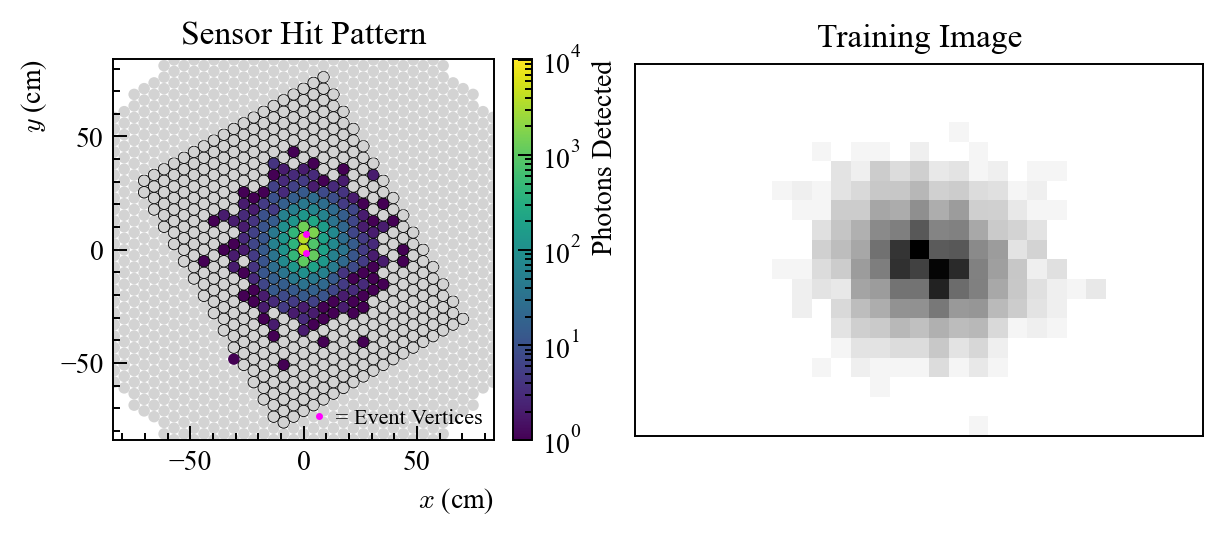

In [15]:
loaded = np.load('data/hit_pattern_data.npz')
det_counts_ms = loaded['det_counts_ms']
pmt_indices_ms = loaded['pmt_indices_ms']
pmt_pos_array = loaded['pmt_pos_array']
pmt_diam = loaded['pmt_diam']
radius_tpc = loaded['radius_tpc']
images_ms = loaded['images_ms']
event_ids_ms = loaded['event_ids_ms']
site1 = loaded['site1']
site2 = loaded['site2']

event_id = 5
ind = event_ids_ms[event_id]

fig, ax = plt.subplots(1, 2, figsize=(6, 2.75), layout='constrained', width_ratios=[0.67, 1])

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('lightgray')
norm = mcolors.LogNorm(vmin=1, vmax=np.amax(det_counts_ms))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

ax[0].set_xlim([-0.8*radius_tpc/10, 0.8*radius_tpc/10])
ax[0].set_ylim([-0.8*radius_tpc/10, 0.8*radius_tpc/10])
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$\it{x}$ (cm)')
ax[0].set_ylabel(r'$\it{y}$ (cm)')
ax[0].set_title('Sensor Hit Pattern')

cbar = fig.colorbar(sm, ax=ax[0], shrink=0.72, label='Photons Detected')

for pmt_i, _ in enumerate(pmt_pos_array):
    pos = pmt_pos_array[pmt_i]
    if pmt_i in pmt_indices_ms[event_id]:
        ec = 'k'
    else:
        ec = 'none'
    ax[0].add_artist(Circle(pos/10., pmt_diam/2./10., lw=0.3, ec=ec, fc=sm.to_rgba(det_counts_ms[event_id, pmt_i])))

ax[0].plot(*site1[ind]/10., marker='.', ls='none', color='magenta', label=' = Event Vertices')
ax[0].plot(*site2[ind]/10., marker='.', ls='none', color='magenta')
ax[0].legend(loc='lower right', handletextpad=0, handlelength=1., borderpad=0)

im = ax[1].imshow(images_ms[event_id].T, origin='lower', cmap='Greys', norm=mcolors.LogNorm())
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Training Image')
fig.savefig('figures/CNN_Image_Prep.pdf')